In [23]:
try:
    import IPython
except:
    !pip install IPython
    import IPython 

from IPython.core.display import HTML

display("Adding style properties to notebook")

HTML("""<style>div {
font-family:Open Sans,sans-serif;}
h1 {color:white;background-color: #446a7f;padding:10px}
h2{color:black; background-color:#b3b6a0; padding:10px}
h3{color:#78BE21; background-color:#446a7f; padding:10px}
h4{color:white; background-color:#78BE21;padding:5px}
.info{background-color:}
img {border: 3px solid #446a7f;}
</style>""")

'Adding style properties to notebook'


<h1>Enriching Collections Data with Data Reconciliation and Linked Art</h1>

The Linked Art reconciliation exemplar provides a step through the process of reconciling geographical place names that occur in the title of artworks by the artist, John Ruskin, to enrich collections data with an additional representation of the geographical coordinates of the place depicted in the artworks. 

From Wikipedia:

<blockquote>"John Ruskin (8 February 1819 – 20 January 1900) was an English writer, philosopher, art critic and polymath of the Victorian era. He wrote on subjects as varied as geology, architecture, myth, ornithology, literature, education, botany and political economy."</blockquote>

John Ruskin travelled extensively in Europe and was a prolific artist, creating drawings of paintings whose titles often included place names for the locations depicted. 

#### Artwork Title contains Place Name
The title of the artworks has been recorded in the title field in many of the collection data records , and this has been used as the basis for the reconciliation process shown here.

#### OpenRefine Tool to Reconcile Data
The place names are reconciled with the <a href="https://www.getty.edu/research/tools/vocabularies/tgn/">Getty Thesaurus of Geographic Names (TGN)</a>, using the <a href="https://openrefine.org/">Open Refine</a> tool.

#### The Getty Thesaurus of Geographic Names (TGN)
Reconciliation with the <a href="https://www.getty.edu/research/tools/vocabularies/tgn/">Getty Thesaurus of Geographic Names (TGN)</a> has allowed additional information to be associated with the artwork: 
- an authoritative global identifier for the geographical location depicted 
- geographical coordinates

#### Input Data Files

The input files are Linked Art files created with the <a href="https://github.com/tgra/Linked-Art/blob/main/01-06-Transform-John-Ruskin.ipynb">`01-06-Transform-John-Ruskin`</a> Jupyter notebook.


### Further Reading

- The Getty Thesaurus of Geographic Names® Online (TGN) http://www.getty.edu/research/tools/vocabularies/tgn
- John Ruskin Wikipedia entry https://en.wikipedia.org/wiki/John_Ruskin



## Reconciliation Process

1. Create CSV file from Linked Art JSON-LD
2. Identify place name in title
3. Use OpenRefine to reconcile place names
4. Define geolocation representation in Linked Art
5. Add place name and coordinates into Linked Art JSON-LD files

## 1. Create CSV file from Linked Art JSON-LD

To reconcile the place names in the artwork titles
- create a CSV file from the JSON-LD Linked Art files
- CSV contains `id` and `_label` properties

The script gets a list of all files in a selected directory using `os.listdir()` and iterates over them.

- `json.load` is used to deserialize the Linked Art JSONLD file to a Python dictionary object. 
 - json.loads uses the following conversion table https://docs.python.org/3/library/json.html#json-to-py-table  

Finally, the script uses  `csv.DictWriter` 
- to create an object that maps the Python dictionary onto output rows. 
- `Dictwriter.writeheader()` writes a row with the field names (as specified in the constructor) to the writer’s file object. 
- `Dictwriter.writerows()` writes all elements in rows to the writer’s file object.


#### Further Reading
- os Python library https://docs.python.org/3/library/os.html
- os.listdir() tutorial https://www.tutorialspoint.com/python/os_listdir.htm
- json Python library https://docs.python.org/3/library/json.html
- csv Python library https://docs.python.org/3/library/csv.html

In [39]:
# import relevant Python libraries

try:
    import os
except:
    %pip install os
    import os

try:
    import json
except:
    %pip install json
    import json 
    
import csv

# list holding a
artworkCSV = []

# Linked Art JSON-LD file location
artworkFileDir = "./data/ruskin/output/json/"
artworkFileList =os.listdir(artworkFileDir)

# iterate over Linked Art JSON-LD files
for artworkFile in artworkFileList:
    # read file and append to 
    with open( artworkFileDir + artworkFile) as artworkFileContents:  
        
        # create json object `artwork` from file
        artworkObjJSON = json.load(artworkFileContents)
        
        # check for "_label" property 
        if "_label" not in artworkObjJSON:
            continue
            
        # append artwork properties to artwork JSON object
        artworkCSV.append( {      
            "id": artworkObjJSON["id"], 
            "place" : artworkObjJSON["_label"], 
            "place_modified": " ", 
            "coords": " "
            })

# end loop
        
        
# create CSV file
artworkCsvFile = "./data/ruskin/ruskin-places.csv" # file location

with open(artworkCsvFile, 'w') as f: 
    # write column headings
    w = csv.DictWriter(f, ["id","place","place_modified","coords"])
    w.writeheader()
    # write rows with artwork properties
    w.writerows(artworkCSV)
    

### Result - CSV File with Place Names

The contents of the resulting CSV file are shown below for illustration.

The CSV file is read into a `pandas` dataframe.  
<blockquote>`Pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. </blockquote>
  
  
A `pandas dataframe` is a pandas data structure containing 
<blockquote>two-dimensional, size-mutable, potentially heterogeneous tabular data.</blockquote>

The pandas dataframe allows easy manipulation of two-dimensional tabular data. 

The `IPython` library is also used to display the contents of the CSV file 
  
#### Further Reading  
- pandas  https://pandas.pydata.org/
- pandas dataframe https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
- IPython use in Jupyter notebooks https://coderzcolumn.com/tutorials/python/how-to-display-contents-of-different-types-in-jupyter-notebook-lab

In [42]:
try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd

try:
    import IPython
except:
    %pip install IPython
    import IPython   
    
from IPython.display import display, HTML, Javascript

 # CSV file location
artworkCsvFile = "./data/ruskin/ruskin-places.csv"

# read CSV file into pandas dataframe 
dataFrame = pd.read_csv(artworkCsvFile,low_memory=False)

# define how many columns and rows to display == all
pd.options.display.max_columns = len(dataFrame.columns)
#pd.options.display.max_rows = len(dataFrame.index)

# use IPython display to display the  contents of CSV file
display(dataFrame)

,id,place,place_modified,coords
0,https://collections.ashmolean.org/collection/1...,Engraving of Ruskin's Drawing of the Petal Vau...,,
1,https://collections.ashmolean.org/collection/1...,Enlarged Study of a Prawn's Rostrum,,
2,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,,
3,https://collections.ashmolean.org/collection/1...,"Autumnal Cloud filling the Valley of Geneva, t...",,
4,https://collections.ashmolean.org/collection/1...,Axmouth Landslip from Dolands Farm,,
...,...,...,...,...
274,https://collections.ashmolean.org/collection/1...,"The Head of a Kite, from Life",,
275,https://www.harvardartmuseums.org/collections/...,Part of a Sketch of the Northwest Porch of St....,,
276,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...,"Gezicht op S. Anastasia te Verona, over de Adige",,
277,https://collections.ashmolean.org/collection/2...,Architectural detail: stone bracket,,


## 2. Identify Place Names in Title

Next, get place name from artwork title
- extract possible place names from the artwork title field, to help with the reconciliation process. 
- a list of possible place names is used to help identify place names in the field. 
- add extracted place names to `place_modified` column 
- update CSV file

A list of place names `placeNames` is created to help with extracting place names from the artwork title. This was produced further to a review of the values in the place column.




In [47]:
artworkCsvFile = "./data/ruskin/ruskin-places.csv" # file location


# read CSV file into pandas dataframe
dataFrame = pd.read_csv(artworkCsvFile,low_memory=False)


# A list of place names `placeNames` is created to help with extracting place names from the artwork title.
placeNames = [
"Florence","Bologna","Lucca","Alps","Oxford","Rome",  "Venice","Fribourg","Neuchâtel","Sestri","Visp","Chamonix",
"Abbeville","Schaffhausen","Verona","Vorarlberg","Baden","Schaffhausen","Faido","Normandy","Genève","Geneva",
"Gloucester","Basel","Luzern","Padua","Habsburg","Rhine","Zug","Aix-la-Chapelle","Siena","Mont Blanc","Lago di Como",
"Bellinzona","Lake of Lecco","Axmouth",
"Bourges",
"Brenner",
"Chelsea",
"Genève",
"Heysham",
"Kempten",
"Lauterbrunnen",
"Lecco",
"Mont Cenis",
"Palazzo Dandolo",
"Ponte Vecchio",
"Rietz",
"Rouen",
"Saint Stefano",
"Saint-Martin-sur-Arve",
"Vevay",
  
]

places = {
        "Venezia":["Venice","Venetian","St Mark","St. Mark"],
         
         "London": ["Westminster", "Chelsea"]}



# iterate over dataframe
for index,row in dataFrame.iterrows():
    
    # iterate over place names
    # check if any place name in placesNames is present in row
    for place in placeNames:
        # if place name found, add to place_modified column
        if place in row["place"]:
            dataFrame.at[index,"place_modified"] = place
    
    # iterate over place names for Venice
    for place in places["Venezia"]:
        # if place found add `Venezia` to place_modified column
        if place in row["place"]:
            dataFrame.at[index,"place_modified"] = "Venezia"

            
# remove records where place_modified is blank
dataFrame = dataFrame[dataFrame.place_modified != " "]
dataFrame.to_csv(artworkCsvFile, index=False) 


### Result - CSV File containing Place Name for use in OpenRefine

The result of this process is a CSV file with the column `place_modified` containing a place name string that will be used for reconciliation in the OpenRefine tool.

Records where a place name has not be identified have been removed from the CSV file.

In [48]:
artworkCsvFile = "./data/ruskin/ruskin-places.csv" # file location

dataFrame = pd.read_csv(artworkCsvFile,low_memory=False)

# display table for illustration
display(dataFrame)

,id,place,place_modified,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,Venezia,
1,https://collections.ashmolean.org/collection/1...,"Autumnal Cloud filling the Valley of Geneva, t...",Geneva,
2,https://collections.ashmolean.org/collection/1...,Axmouth Landslip from Dolands Farm,Axmouth,
3,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",Oxford,
4,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,Venezia,
...,...,...,...,...
116,https://collections.ashmolean.org/collection/1...,Sketch of the Oak Spray in Mantegna's Fresco o...,Padua,
117,https://www.nga.gov/collection/72870,The Garden of San Miniato near Florence,Florence,
118,https://www.harvardartmuseums.org/collections/...,Part of a Sketch of the Northwest Porch of St....,Venezia,
119,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...,"Gezicht op S. Anastasia te Verona, over de Adige",Verona,


## 3. Use OpenRefine to Reconcile Place Names

Next
- use OpenRefine to match the values in the place_modified field, with place names in the name authority, The Getty Thesaurus of Geographic Names® Online (TGN).

`OpenRefine` is a tool for working with messy data, and includes support for reconciliation with external data such as name authorities.

`The Getty Thesaurus of Geographic Names® Online (TGN)` is one of several Getty Vocabularies that provide a structured resource that can be used to improve access to information about art, architecture, and material culture. From the website:

<blockquote>Through rich metadata and links, the Getty Vocabularies provide powerful conduits for knowledge creation, research, and discovery for digital art history and related disciplines.

TGN is a thesaurus. TGN is not a geographic information system (GIS), although it may be linked to existing major, general-purpose, geographic databases and maps. While most records in TGN include coordinates, these coordinates are approximate and are intended for reference ("finding purposes") only (as is true of coordinates in most atlases and other resources, including NGA (formerly NIMA) databases).

</blockquote>


#### Further Reading

- OpenRefine https://openrefine.org/
- The Getty Thesaurus of Geographic Names® Online (TGN) http://www.getty.edu/research/tools/vocabularies/tgn

In [6]:
from IPython.display import IFrame, HTML

display(HTML("<h4>Open Refine Website</h4>"))

display(IFrame('https://openrefine.org/documentation.html', '100%', '600px'))

### Method
    
The method used to reconcile the place names:
- Download and install OpenRefine https://openrefine.org/download.html
- Open OpenRefine and create a project
- Upload the places CSV file
- Reconcile place names in `place_modified`
- Choose the TGN service to reconcile data with
- Review Reconciliation Search Results
- Add a Column Containing Entity TGN Identifiers further to Reconciliation Process
- Manual Reconciliation

#### Further Reading
- OpenRefine https://openrefine.org


### Download and Install OpenRefine

- Download OpenRefine at https://openrefine.org/download.html
- Installation instructions at https://docs.openrefine.org/manual/installing

### Open OpenRefine and Create a Project

The following video illustrates how to create a project in OpenRefine using a CSV file on the local drive.

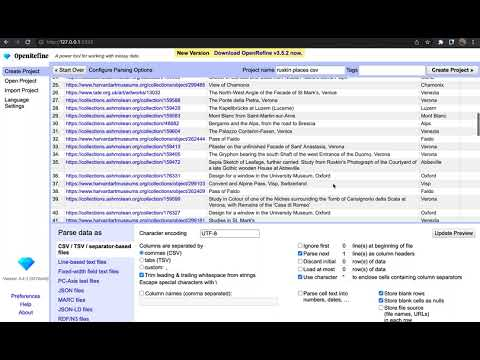

In [7]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Create Project</h4>"))


# video of project creation in OpenRefine

YouTubeVideo('h1aLc5uvdck', width=1024, height=576)

### Reconcile Place Names in `place_modified`

- Right-click on `place_modified` column header
- Select `Start reconciling`

<img width="800px" src="docs/media/img/openrefine2.png"/>

### Choose the TGN Service to Reconcile Data With

- Choose the Getty Voculabary Reconciliation Service that includes the TGN 

The video shows the following process:
- select a column to reconcile 
- select a service to reconcile with
- review options
- start reconciliation

#### Further Reading 
- Reconciliation services known to Wikidata - https://reconciliation-api.github.io/testbench/
- TGN https://www.getty.edu/research/tools/vocabularies/tgn/

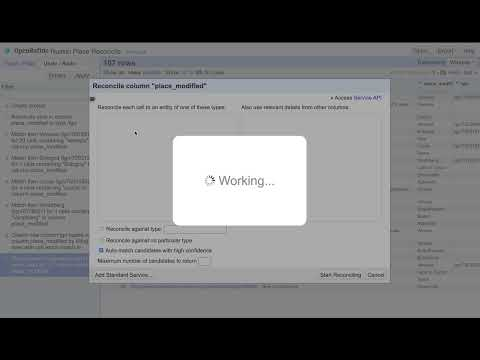

In [8]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Start Reconciliation</h4>"))


YouTubeVideo('Zm0woMobjpI', width=1024, height=576)



### Review Reconciliation Search Results

Once the reconciliation process has completed it is necessary to review the results. Using the TGN it is noticeable that there are many places in the United States of America that have the same names as locations in Italy. 

A review of each match is necessary. Once a correct match has been identified, this match can be applied to all cells with the same place name. 

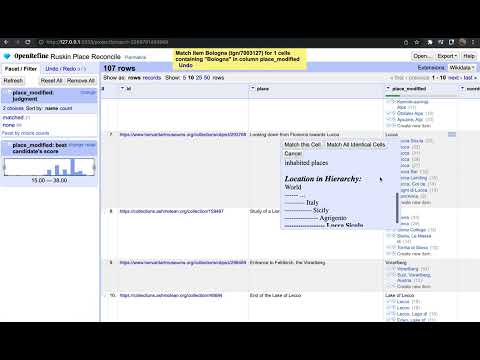

In [9]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Review Reconciliation Results</h4>"))

YouTubeVideo('pT0b0vsPRJ0', width=1024, height=576)




### Add a Column Containing Entity TGN Identifiers further to Reconciliation Process

- Create new column to hold the TGN identifiers

<img width="800px" src="docs/media/img/tgncol.png"/>

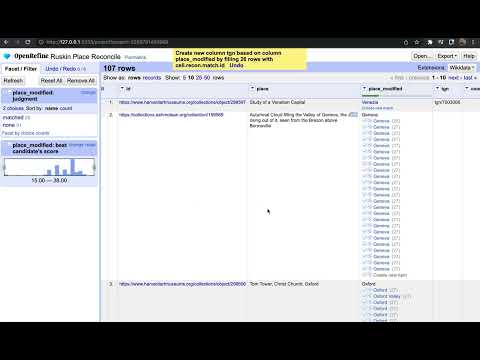

In [10]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Add Entity Identifier Column</h4>"))

YouTubeVideo('PNPhs_7MQ6o', width=1024, height=576)


### Manual Reconciliation

Some additional manual reconciliation was required using the TGN search form.
    
<img width="800px" src="docs/media/img/tgn.png"/>

#### Further Reading
- TGN search form  http://www.getty.edu/research/tools/vocabularies/tgn
    

### Result - CSV file with TGN Identifiers

The result of the reconciliation process is a new column with TGN name authority identifiers for place names identified in the artwork title. 

A CSV file is created with the following steps:
- export CSV file from OpenRefine
- save as [data/ruskin/ruskin-places-rec.csv](data/ruskin/ruskin-places-rec.csv) `

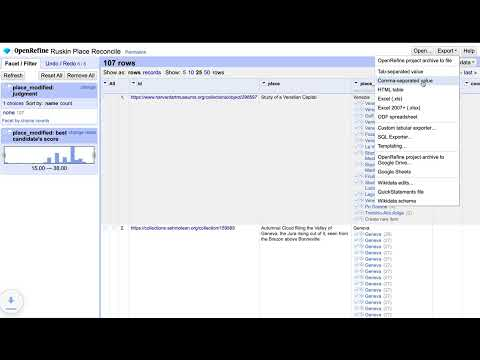

In [11]:
from IPython.display import YouTubeVideo, HTML

display(HTML("<h4>Video - OpenRefine - Export Results as CSV</h4>"))

YouTubeVideo('0tBjqr5AEmA', width=1024, height=576)

#### Remove rows without TGN identifier

- A final step removes rows that do not have a TGN identifier.
- The resulting dataset is shown in tabular format below.

In [49]:
reconciledRuskinPlaces = "data/ruskin/ruskin-places-rec.csv" 
reconciledRuskinPlaces = "data/ruskin/ruskin-places-csv-0422.csv" 



# read file  into pandas dataframe
df = pd.read_csv(reconciledRuskinPlaces,low_memory=False)

# remove rows that have an empty tgn field value
df = df[df.tgn != ""]

# write dataframe to file 
df.to_csv(reconciledRuskinPlaces, index=False) 

# for illustration display dataframe

display(df)

,id,place,...,tgn,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7003006,NaN
1,https://collections.ashmolean.org/collection/1...,"Autumnal Cloud filling the Valley of Geneva, t...",...,tgn/7003746,NaN
2,https://collections.ashmolean.org/collection/1...,Axmouth Landslip from Dolands Farm,...,tgn/1028371,NaN
3,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",...,tgn/7011931,NaN
4,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7003006,NaN
...,...,...,...,...,...
116,https://collections.ashmolean.org/collection/1...,Sketch of the Oak Spray in Mantegna's Fresco o...,...,tgn/7003085,NaN
117,https://www.nga.gov/collection/72870,The Garden of San Miniato near Florence,...,tgn/7000457,NaN
118,https://www.harvardartmuseums.org/collections/...,Part of a Sketch of the Northwest Porch of St....,...,tgn/7003006,NaN
119,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...,"Gezicht op S. Anastasia te Verona, over de Adige",...,tgn/7003262,NaN


### Add Geographical Coordinates to CSV file
The next step is to associate geographical coordinates with the Linked Art artwork representations, using the TGN identifiers to query the TGN web service and return geographical coordinates.

Steps:
- request JSON file from http://vocab.getty.edu/tgn/ using TGN identifier
- extract geocoordinates from response
- add geocoordinates to CSV file

In [54]:
import requests

latprop = "http://www.w3.org/2003/01/geo/wgs84_pos#lat"
lngprop = "http://www.w3.org/2003/01/geo/wgs84_pos#long"


display(HTML("<H2>Geographical coordinates retrieved from TGN web service</H2>"))   

reconciledRuskinPlaces = "./data/ruskin/ruskin-places-rec.csv" 

reconciledRuskinPlaces = "data/ruskin/ruskin-places-csv-0422.csv" 

reconciledRuskinPlacesCoords = "./data/ruskin/ruskin-places-rec-coords.csv" 

# create dataframe from CSV file containing reconciled data including TGN identifiers
dataFrameRuskinPlaces = pd.read_csv(reconciledRuskinPlaces,low_memory=False)

# set type for column 'coords'  as string in dataframe
dataFrameRuskinPlaces['coords'] = dataFrameRuskinPlaces['coords'].astype(str)


display(HTML("<p>Retrieving geocoordinates from vocab.getty.edu TGN API. Please wait for task to complete.</p>"))

# create dataframe to hold geographical coordinates with columns tng and latlng
dataFrameGeo = pd.DataFrame({}, columns=['tgn', 'latlng'])

# iterate through reconciled data containing place names and TGN identifiers
for identifier_tgn in dataFrameRuskinPlaces['tgn'].unique():
    if "tgn/" not in identifier_tgn :
        continue
    # print . to indicate progress
    print(".", end='')
    
    #create query string for web service - get tgn id using .split()
    query = "http://vocab.getty.edu/tgn/" + identifier_tgn.split("tgn/",1)[1] +"-place.json"
    
    # use requests.get() to query TGN web service using TGN identifier to return geo coordinates 
    resultsJSON = requests.get(query).json()
    
    # get lat lng from web service query results
    for record in  resultsJSON:
        
        try:
            lat =  resultsJSON[record][latprop][0]["value"]
            lng =  resultsJSON[record][lngprop][0]["value"]
        
            # create string for lat lng
            latlng = str(lat) + "," + str(lng)
        
       
            # append TGN identifier and lat lng to the dataFrameGeo 
            dataFrameGeo = dataFrameGeo.append(
                {
                 'tgn': identifier_tgn, 
                 'latlng': latlng
                }, 
            ignore_index=True)
        except:
            continue
        

# for illustration display dataFrameGeo with addition of geo coords
display(dataFrameGeo)

............................................

,tgn,latlng
0,tgn/7003006,"45.583333,12.566667"
1,tgn/7003746,"46.196732,6.110443"
2,tgn/1028371,"50.716667,-3.05"
3,tgn/7011931,"51.75,-1.25"
4,tgn/7003127,"44.466667,11.433333"
5,tgn/7007746,"46.416667,10"
6,tgn/7003165,"44.033333,10.45"
7,tgn/7003168,"43.216667,11.4"
8,tgn/7018001,"47.25,9.9167"
9,tgn/7011128,"51.833333,-2.25"


### Update CSV File with Geographical Coordinates 

The following code 
- merges `dataFrameRuskinPlaces` with `dataFrameGeo` containing the geocoordinates.
- removes `coords` from `dataFrameRuskinPlaces` 
- renames `latlng` to `coords` in `dataFrameRuskinPlaces` 
- writes `dataFrameRuskinPlaces` to a CSV file

In [55]:
reconciledRuskinPlacesCoords = "./data/ruskin/ruskin-places-rec-coords.csv" 


# merge dataframe with coords with dataframe from csv
dataFrameRuskinPlaces = dataFrameRuskinPlaces.merge(dataFrameGeo, on='tgn') 

# drop column coords
dataFrameRuskinPlaces = dataFrameRuskinPlaces.drop('coords', 1) # drop column coords

# rename column latlng to coords
dataFrameRuskinPlaces.rename(columns={'latlng': 'coords'}, inplace=True) # rename column tgn to coords

# drop rows that have na value in coords column
dataFrameRuskinPlaces.dropna(subset=['coords'])  

# write to CSV file
dataFrameRuskinPlaces.to_csv(reconciledRuskinPlacesCoords, index=False)

display(HTML("<H4>CSV file with Geographical Coordinates</H4>"))
# display dataframe
display(dataFrameRuskinPlaces)


,id,place,...,tgn,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7003006,"45.583333,12.566667"
1,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7003006,"45.583333,12.566667"
2,https://collections.ashmolean.org/collection/1...,Part of the Base of a Pilaster in Santa Maria ...,...,tgn/7003006,"45.583333,12.566667"
3,https://www.tate.org.uk/art/artworks/13032,The North-West Angle of the Facade of St Mark’...,...,tgn/7003006,"45.583333,12.566667"
4,https://collections.ashmolean.org/collection/1...,"The Palazzo Contarini-Fasan, Venice",...,tgn/7003006,"45.583333,12.566667"
...,...,...,...,...,...
114,https://www.harvardartmuseums.org/collections/...,Kempten,...,tgn/7155787,"49.966667,7.933333"
115,https://collections.ashmolean.org/collection/1...,"Etching of Turner's Drawing of 'Rietz, near Sa...",...,tgn/8713430,"47.285,11.03"
116,https://collections.ashmolean.org/collection/1...,Evening in Autumn under the Castle of Habsburg,...,tgn/1100282,"47.4667,8.1833"
117,https://collections.ashmolean.org/collection/1...,Sketch of the Oak Spray in Mantegna's Fresco o...,...,tgn/7003085,"45.416667,11.883333"


##  4. Define Geolocation Representation in Linked Art

The next step is to define a representation in Linked Art for geographical coordinates of place depicted in artwork. The relevant parts of the Linked Art model are: 
 - Depiction
 - Geospatial approximation
 - Depiction of place with approximate location


### Linked Art Data Model - Depiction

From https://linked.art/model/object/aboutness/#depiction

<blockquote>Many sorts of artwork depict things that can be pointed out in the artwork. These could be identifiable entities, such as a known Person or Object with a name or identifier, or unidentifiable (perhaps fictional) instances of a class of entity, such as a depiction of a battle but not any particular battle. For example a portrait depicts the person sitting for it, or a sketch of a generic landscape depicts a place even if it's not a particular, known location. The depiction pattern describes what is in the artwork's image.</blockquote>

<blockquote>This is modeled using the `represents` property on the VisualItem, which refers to the entity that is being depicted.</blockquote>


The following representation will be used for place depicted in Ruskin's artworks:


`{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://linked.art/example/object/34",
  "type": "HumanMadeObject",
  "_label": "artwork title including place name",
    "shows": [
    {
      "type": "VisualItem",
      "represents": [
        {
          "type": "Place",
          "_label": "place name"
        }
      ]
    }
  ]}`


### Linked Art Data Model - Geospatial Approximation

The Linked Art data model describes how to represent geospatial approximation.

From https://linked.art/model/place/#geospatial-approximation

<blockquote>All recorded locations are approximate to some degree. It may be desirable to capture this approximation separately from the actual place, especially when that approximation is very uncertain. Especially if the place is the exact location of several events, and perhaps an address or other information is known, but not the exact geospatial coordinates.</blockquote>
    

<blockquote>Secondly, as a place is defined by exactly one definition, but there might be multiple approximations such as a polygon as well as the central point, the real place that an activity occured at can be related to multiple approximate places to capture these different approximations.</blockquote>


Example Linked Art representation of geospatial approximation:

`{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://linked.art/example/place/4",
  "type": "Place",
  "_label": "True Auction House Location",
  "approximated_by": [
    {
      "type": "Place",
      "_label": "Auction House Location Approximation",
      "defined_by": "POINT(-0.0032937526703165 51.515107154846)"
    }
  ]
}`


### Linked Art Data Model - Depiction of Place with Approximate Location

Relating the Linked Art model for geospatial approximation  to the depiction of places in Ruskin's works, the following representation has been created:


`{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "https://linked.art/example/object/34",
  "type": "HumanMadeObject",
  "_label": "artwork title including place name",
    "shows": [
    {
      "type": "VisualItem",
      "represents": [
        {
          "type": "Place",
          "_label": "Lucca",
          "approximated_by": [
                {
                  "type": "Place",
                  "_label": "Lucca - Location Approximation",
                  "defined_by": "POINT(-0.0032937526703165 51.515107154846)"
                }
              ]
        }
      ]
    }
  ]}`




#### Further reading

- Depiction https://linked.art/model/object/aboutness/#depiction

- Geospatial approximation https://linked.art/model/place/#geospatial-approximation

<h3>Visualisation - Geographical Coordinates of Place Depicted in Artwork</h3>
<p>Below is a visualisation of the Linked Art JSON-LD representation of geographical coordinates of a place depicted in an artwork. 
    
Further information
- explore the representation by clicking on nodes
- SVG representation 
- uses 
   - D3.js
   - is a modified version of code available in the JSON-LD Playground codebase


#### Further Reading

- d3.js  https://d3js.org/
- jsonld-vis https://github.com/science-periodicals/jsonld-vis
- jsonld playground  https://json-ld.org/playground and https://json-ld.org/playground/jsonld-vis.js 


<div id='vis' style='height:100%;width:6000px'></div>

In [57]:
from IPython.core.display import Javascript

code2 = "var file = './data/examples/geolocation.json';"\
        "var selector = '#vis';" \
        "visjsonld(file, selector); "  

with open('./src/js/visld.js', 'r') as _jscript:
    code = _jscript.read() + code2

Javascript(code)

<IPython.core.display.Javascript object>

##  5. Add Place Name and Coordinates into Linked Art JSON-LD Files

The final step is to add place names and geocoordinates to the original Linked Art files. 

The updated Linked Art files, including the geocoordinates, will later be used in a storymap visualisation of the artworks of John Ruskin, mapping the artworks to the locations that they depict, using the geocoordinates.

The `cromulent` Python library is used to create the JSON-LD representation.

In [58]:
try:
    import cromulent 
except:
    %pip install cromulent
    import cromulent
    
from cromulent.model import factory

from cromulent.model import factory, Actor, Production, BeginningOfExistence, EndOfExistence, TimeSpan, Place
from cromulent.model import InformationObject, Phase, VisualItem 
from cromulent.vocab import Painting, Drawing,Miniature,add_art_setter, PrimaryName, Name, CollectionSet, instances, Sculpture 
from cromulent.vocab import aat_culture_mapping, AccessionNumber, Height, Width, SupportPart, Gallery, MuseumPlace 
from cromulent.vocab import BottomPart, Description, RightsStatement, MuseumOrg, Purchase
from cromulent.vocab import Furniture, Mosaic, Photograph, Coin, Vessel, Graphic, Enamel, Embroidery, PhotographPrint
from cromulent.vocab import PhotographAlbum, PhotographBook, PhotographColor, PhotographBW, Negative, Map, Clothing, Furniture
from cromulent.vocab import Sample, Architecture, Armor, Book, DecArts, Implement, Jewelry, Manuscript, SiteInstallation, Text, Print
from cromulent.vocab import TimeBasedMedia, Page, Folio, Folder, Box, Envelope, Binder, Case, FlatfileCabinet
from cromulent.vocab import HumanMadeObject,Tapestry,LocalNumber
from cromulent.vocab import Type,Set
from cromulent.vocab import TimeSpan, Actor, Group, Acquisition, Place
from cromulent.vocab import Production, TimeSpan, Actor
from cromulent.vocab import LinguisticObject,DigitalObject, DigitalService
from cromulent import reader

try:
    import pandas as pd
except:
    %pip install pandas
    import pandas as pd
    
try:
    import os
except:
    %pip install os
    import os
    
try:
    import json
except:
    %pip install json
    import json 
    
artwork = {}
cnt=1

# directory that will contain updated Ruskin artwork representations including geo coords
storyvisdir = "data/ruskin/storyvis/json"

# file containing reconciled data with coordinates
filecoord = "./data/ruskin/ruskin-places-rec-coords.csv" 
# open file containing reconciled data with geo coordinates
dataframeGeo = pd.read_csv(filecoord,low_memory=False)


# directory containing Rusking artworks represented in Linked Art JSON-LD
ruskindir = "data/ruskin/output/json"
file_list=os.listdir(ruskindir)

# for each linked art json file
for file in file_list:
    # open file
    with open( ruskindir + "/" + file) as json_file:
        
        # get json object from file object with json.load() https://www.geeksforgeeks.org/json-load-in-python/
        artwork = json.load(json_file)
        
        # if id field is in the id field of data file containing geographical coordinates, add update the file
        if artwork["id"] in dataframeGeo["id"].tolist():
            
            display(HTML("<h4>" + artwork["_label"] + "</h4>"))
            # get rows in dataframeGeo where id == artwork id from JSON-LD file
            # Access a group of rows and columns by label(s) or a boolean array
            # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
            rows = dataframeGeo.loc[dataframeGeo['id'] == artwork["id"]]
            
            print("Matching row in geographical coordinates file for artwork")
            display(rows)
            
            # get first row https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
            row=rows.iloc[0]
            
         
            
            # get place name and coords from geocoords file 
            placeName = row["place"]
            coords = row["coords"]
            # replace comma in coords with space
            coords = coords.replace(",", " ")
           
            # increment counter
            cnt = cnt+1
             
            # use cromulent to create Linked Art representation of place depicted
             # https://github.com/thegetty/crom
            
            approx_place = Place()
            approx_place._label = placeName
            approx_place.defined_by = "POINT(" + coords + ")"
            
            place = Place()
            place._label = placeName
            place.approximated_by = approx_place
            
            visualItem = VisualItem()
            visualItem.represents = place
            
            # append new representation to artwork json object
            artwork["shows"] = factory.toJSON(visualItem)
            
            print("Geographical coordinates representation to be added:")
            print(json.dumps(factory.toJSON(visualItem), indent=2))
            
            # open output file 
            text_file = open(storyvisdir + "/" + str(cnt) + ".json", "wt")
            
            # write to file and close
            n = text_file.write(json.dumps(artwork,indent=2))
            text_file.close()
            print("File updated" )

HTML("<h4>Files updated</h4>")

Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
0,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/87",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/175",
      "type": "Place",
      "_label": "Study of a Venetian Capital",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/174",
          "type": "Place",
          "_label": "Study of a Venetian Capital",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
20,https://collections.ashmolean.org/collection/1...,"Autumnal Cloud filling the Valley of Geneva, t...",...,tgn/7003746,"46.196732,6.110443"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/88",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/177",
      "type": "Place",
      "_label": "Autumnal Cloud filling the Valley of Geneva, the Jura rising out of it, seen from the Brezon above Bonneville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/176",
          "type": "Place",
          "_label": "Autumnal Cloud filling the Valley of Geneva, the Jura rising out of it, seen from the Brezon above Bonneville",
          "defined_by": "POINT(46.196732 6.110443)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
22,https://collections.ashmolean.org/collection/1...,Axmouth Landslip from Dolands Farm,...,tgn/1028371,"50.716667,-3.05"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/89",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/179",
      "type": "Place",
      "_label": "Axmouth Landslip from Dolands Farm",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/178",
          "type": "Place",
          "_label": "Axmouth Landslip from Dolands Farm",
          "defined_by": "POINT(50.716667 -3.05)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
23,https://www.harvardartmuseums.org/collections/...,"Tom Tower, Christ Church, Oxford",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/90",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/181",
      "type": "Place",
      "_label": "Tom Tower, Christ Church, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/180",
          "type": "Place",
          "_label": "Tom Tower, Christ Church, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
1,https://www.harvardartmuseums.org/collections/...,Study of a Venetian Capital,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/91",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/183",
      "type": "Place",
      "_label": "Study of a Venetian Capital",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/182",
          "type": "Place",
          "_label": "Study of a Venetian Capital",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
34,https://www.tate.org.uk/art/artworks/13033,View of Bologna,...,tgn/7003127,"44.466667,11.433333"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/92",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/185",
      "type": "Place",
      "_label": "View of Bologna",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/184",
          "type": "Place",
          "_label": "View of Bologna",
          "defined_by": "POINT(44.466667 11.433333)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
35,https://www.harvardartmuseums.org/collections/...,Fragment of the Alps,...,tgn/7007746,"46.416667,10"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/93",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/187",
      "type": "Place",
      "_label": "Fragment of the Alps",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/186",
          "type": "Place",
          "_label": "Fragment of the Alps",
          "defined_by": "POINT(46.416667 10)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
40,https://www.harvardartmuseums.org/collections/...,Looking down from Florence towards Lucca,...,tgn/7003165,"44.033333,10.45"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/94",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/189",
      "type": "Place",
      "_label": "Looking down from Florence towards Lucca",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/188",
          "type": "Place",
          "_label": "Looking down from Florence towards Lucca",
          "defined_by": "POINT(44.033333 10.45)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
44,https://collections.ashmolean.org/collection/1...,Study of a Lion Cub from Nicola Pisano's Siena...,...,tgn/7003168,"43.216667,11.4"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/95",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/191",
      "type": "Place",
      "_label": "Study of a Lion Cub from Nicola Pisano's Siena Pulpit",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/190",
          "type": "Place",
          "_label": "Study of a Lion Cub from Nicola Pisano's Siena Pulpit",
          "defined_by": "POINT(43.216667 11.4)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
48,https://www.harvardartmuseums.org/collections/...,"Entrance to Feldkirch, the Vorarlberg",...,tgn/7018001,"47.25,9.9167"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/96",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/193",
      "type": "Place",
      "_label": "Entrance to Feldkirch, the Vorarlberg",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/192",
          "type": "Place",
          "_label": "Entrance to Feldkirch, the Vorarlberg",
          "defined_by": "POINT(47.25 9.9167)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
49,https://collections.ashmolean.org/collection/1...,The Tower of Gloucester Cathedral,...,tgn/7011128,"51.833333,-2.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/97",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/195",
      "type": "Place",
      "_label": "The Tower of Gloucester Cathedral",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/194",
          "type": "Place",
          "_label": "The Tower of Gloucester Cathedral",
          "defined_by": "POINT(51.833333 -2.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
50,https://collections.ashmolean.org/collection/1...,The Courtyard of a Late Gothic Wooden House at...,...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/98",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/197",
      "type": "Place",
      "_label": "The Courtyard of a Late Gothic Wooden House at Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/196",
          "type": "Place",
          "_label": "The Courtyard of a Late Gothic Wooden House at Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
57,https://collections.ashmolean.org/collection/1...,Detail of the Equestrian Statue on the Summit ...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/99",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/199",
      "type": "Place",
      "_label": "Detail of the Equestrian Statue on the Summit of the Tomb of Cangrande I della Scala, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/198",
          "type": "Place",
          "_label": "Detail of the Equestrian Statue on the Summit of the Tomb of Cangrande I della Scala, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
58,https://www.harvardartmuseums.org/collections/...,Sketch of Verona,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/100",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/201",
      "type": "Place",
      "_label": "Sketch of Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/200",
          "type": "Place",
          "_label": "Sketch of Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
74,https://www.harvardartmuseums.org/collections/...,Falls of Schaffhausen,...,tgn/7106737,"49.266667,6.816667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/101",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/203",
      "type": "Place",
      "_label": "Falls of Schaffhausen",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/202",
          "type": "Place",
          "_label": "Falls of Schaffhausen",
          "defined_by": "POINT(49.266667 6.816667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
77,https://www.harvardartmuseums.org/collections/...,Towers at Baden,...,tgn/7005172,"48.75,8.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/102",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/205",
      "type": "Place",
      "_label": "Towers at Baden",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/204",
          "type": "Place",
          "_label": "Towers at Baden",
          "defined_by": "POINT(48.75 8.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
51,https://www.harvardartmuseums.org/collections/...,"Church of St. Wulfran, Abbeville",...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/103",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/207",
      "type": "Place",
      "_label": "Church of St. Wulfran, Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/206",
          "type": "Place",
          "_label": "Church of St. Wulfran, Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
59,https://collections.ashmolean.org/collection/1...,The Sarcophagus and Effigy of the Tomb of Cang...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/104",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/209",
      "type": "Place",
      "_label": "The Sarcophagus and Effigy of the Tomb of Cangrande I della Scala, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/208",
          "type": "Place",
          "_label": "The Sarcophagus and Effigy of the Tomb of Cangrande I della Scala, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
60,https://collections.ashmolean.org/collection/1...,"The Tomb of Cangrande I della Scala, Verona",...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/105",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/211",
      "type": "Place",
      "_label": "The Tomb of Cangrande I della Scala, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/210",
          "type": "Place",
          "_label": "The Tomb of Cangrande I della Scala, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
75,https://www.harvardartmuseums.org/collections/...,Falls of Schaffhausen,...,tgn/7106737,"49.266667,6.816667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/106",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/213",
      "type": "Place",
      "_label": "Falls of Schaffhausen",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/212",
          "type": "Place",
          "_label": "Falls of Schaffhausen",
          "defined_by": "POINT(49.266667 6.816667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
78,https://www.harvardartmuseums.org/collections/...,Bellinzona,...,tgn/7007318,"46.194902,9.024729"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/107",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/215",
      "type": "Place",
      "_label": "Bellinzona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/214",
          "type": "Place",
          "_label": "Bellinzona",
          "defined_by": "POINT(46.194902 9.024729)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
2,https://collections.ashmolean.org/collection/1...,Part of the Base of a Pilaster in Santa Maria ...,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/108",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/217",
      "type": "Place",
      "_label": "Part of the Base of a Pilaster in Santa Maria dei Miracoli, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/216",
          "type": "Place",
          "_label": "Part of the Base of a Pilaster in Santa Maria dei Miracoli, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
79,https://collections.ashmolean.org/collection/1...,Tracing of Turner's 'Heysham and Cumberland Mo...,...,tgn/1029546,"54.033333,-2.9"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/109",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/219",
      "type": "Place",
      "_label": "Tracing of Turner's 'Heysham and Cumberland Mountains'",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/218",
          "type": "Place",
          "_label": "Tracing of Turner's 'Heysham and Cumberland Mountains'",
          "defined_by": "POINT(54.033333 -2.9)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
80,https://collections.ashmolean.org/collection//...,"Bellagio, Lago di Como",...,tgn/7006070,"46,9.283333"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/110",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/221",
      "type": "Place",
      "_label": "Bellagio, Lago di Como",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/220",
          "type": "Place",
          "_label": "Bellagio, Lago di Como",
          "defined_by": "POINT(46 9.283333)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
81,https://collections.ashmolean.org/collection/1...,Sketch of a Spandril in the western Porch of B...,...,tgn/7661997,"47.25,2.416667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/111",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/223",
      "type": "Place",
      "_label": "Sketch of a Spandril in the western Porch of Bourges Cathedral",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/222",
          "type": "Place",
          "_label": "Sketch of a Spandril in the western Porch of Bourges Cathedral",
          "defined_by": "POINT(47.25 2.416667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
45,https://collections.ashmolean.org/collection/1...,Sketch of Lioness and Cubs from Nicola Pisano'...,...,tgn/7003168,"43.216667,11.4"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/112",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/225",
      "type": "Place",
      "_label": "Sketch of Lioness and Cubs from Nicola Pisano's Siena Pulpit",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/224",
          "type": "Place",
          "_label": "Sketch of Lioness and Cubs from Nicola Pisano's Siena Pulpit",
          "defined_by": "POINT(43.216667 11.4)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
82,https://www.harvardartmuseums.org/collections/...,View of Chamonix,...,tgn/1032562,"45.924308,6.867316"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/113",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/227",
      "type": "Place",
      "_label": "View of Chamonix",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/226",
          "type": "Place",
          "_label": "View of Chamonix",
          "defined_by": "POINT(45.924308 6.867316)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
3,https://www.tate.org.uk/art/artworks/13032,The North-West Angle of the Facade of St Mark’...,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/114",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/229",
      "type": "Place",
      "_label": "The North-West Angle of the Facade of St Mark\u2019s, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/228",
          "type": "Place",
          "_label": "The North-West Angle of the Facade of St Mark\u2019s, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
61,https://collections.ashmolean.org/collection/1...,"The Ponte della Pietra, Verona",...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/115",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/231",
      "type": "Place",
      "_label": "The Ponte della Pietra, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/230",
          "type": "Place",
          "_label": "The Ponte della Pietra, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
84,https://collections.ashmolean.org/collection/1...,The Kapellbrücke at Luzern (Lucerne),...,tgn/7007280,"47.083333,8.266667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/116",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/233",
      "type": "Place",
      "_label": "The Kapellbr\u00fccke at Luzern (Lucerne)",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/232",
          "type": "Place",
          "_label": "The Kapellbr\u00fccke at Luzern (Lucerne)",
          "defined_by": "POINT(47.083333 8.266667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
86,https://collections.ashmolean.org/collection/1...,Mont Blanc from Saint-Martin-sur-Arve,...,tgn/7609880,"45.938883,6.643866"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/117",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/235",
      "type": "Place",
      "_label": "Mont Blanc from Saint-Martin-sur-Arve",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/234",
          "type": "Place",
          "_label": "Mont Blanc from Saint-Martin-sur-Arve",
          "defined_by": "POINT(45.938883 6.643866)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
36,https://collections.ashmolean.org/collection//...,"Bergamo and the Alps, from the road to Brescia",...,tgn/7007746,"46.416667,10"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/118",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/237",
      "type": "Place",
      "_label": "Bergamo and the Alps, from the road to Brescia",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/236",
          "type": "Place",
          "_label": "Bergamo and the Alps, from the road to Brescia",
          "defined_by": "POINT(46.416667 10)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
4,https://collections.ashmolean.org/collection/1...,"The Palazzo Contarini-Fasan, Venice",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/119",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/239",
      "type": "Place",
      "_label": "The Palazzo Contarini-Fasan, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/238",
          "type": "Place",
          "_label": "The Palazzo Contarini-Fasan, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
87,https://www.harvardartmuseums.org/collections/...,Pass of Faido,...,tgn/1064047,"46.479417,8.797659"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/120",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/241",
      "type": "Place",
      "_label": "Pass of Faido",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/240",
          "type": "Place",
          "_label": "Pass of Faido",
          "defined_by": "POINT(46.479417 8.797659)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
62,https://collections.ashmolean.org/collection/1...,Pilaster on the unfinished Facade of Sant' Ana...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/121",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/243",
      "type": "Place",
      "_label": "Pilaster on the unfinished Facade of Sant' Anastasia, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/242",
          "type": "Place",
          "_label": "Pilaster on the unfinished Facade of Sant' Anastasia, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
91,https://www.harvardartmuseums.org/collections/...,Ponte Vecchio,...,tgn/7018159,"45.438611,12.326667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/122",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/245",
      "type": "Place",
      "_label": "Ponte Vecchio",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/244",
          "type": "Place",
          "_label": "Ponte Vecchio",
          "defined_by": "POINT(45.438611 12.326667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
63,https://collections.ashmolean.org/collection/1...,The Gryphon bearing the south Shaft of the wes...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/123",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/247",
      "type": "Place",
      "_label": "The Gryphon bearing the south Shaft of the west Entrance of the Duomo, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/246",
          "type": "Place",
          "_label": "The Gryphon bearing the south Shaft of the west Entrance of the Duomo, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
52,https://collections.ashmolean.org/collection/1...,"Sepia Sketch of Leafage, further carried: Stud...",...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/124",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/249",
      "type": "Place",
      "_label": "Sepia Sketch of Leafage, further carried: Study from Ruskin's Photograph of the Courtyard of a late Gothic wooden House at Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/248",
          "type": "Place",
          "_label": "Sepia Sketch of Leafage, further carried: Study from Ruskin's Photograph of the Courtyard of a late Gothic wooden House at Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
24,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/125",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/251",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/250",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
93,https://www.harvardartmuseums.org/collections/...,"Convent and Alpine Pass, Visp, Switzerland",...,tgn/8711124,"46.301907,7.870004"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/126",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/253",
      "type": "Place",
      "_label": "Convent and Alpine Pass, Visp, Switzerland",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/252",
          "type": "Place",
          "_label": "Convent and Alpine Pass, Visp, Switzerland",
          "defined_by": "POINT(46.301907 7.870004)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
88,https://www.harvardartmuseums.org/collections/...,Pass of Faido,...,tgn/1064047,"46.479417,8.797659"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/127",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/255",
      "type": "Place",
      "_label": "Pass of Faido",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/254",
          "type": "Place",
          "_label": "Pass of Faido",
          "defined_by": "POINT(46.479417 8.797659)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
64,https://collections.ashmolean.org/collection/1...,Study in Colour of one of the Niches surroundi...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/128",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/257",
      "type": "Place",
      "_label": "Study in Colour of one of the Niches surrounding the Tomb of Cansignorio della Scala at Verona, with Remains of the 'Casa di Romeo'",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/256",
          "type": "Place",
          "_label": "Study in Colour of one of the Niches surrounding the Tomb of Cansignorio della Scala at Verona, with Remains of the 'Casa di Romeo'",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
94,https://collections.ashmolean.org/collection/1...,Pine Forest on Mont Cenis,...,tgn/7017223,"45.259578,6.900329"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/129",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/259",
      "type": "Place",
      "_label": "Pine Forest on Mont Cenis",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/258",
          "type": "Place",
          "_label": "Pine Forest on Mont Cenis",
          "defined_by": "POINT(45.259578 6.900329)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
25,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/130",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/261",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/260",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
5,https://www.harvardartmuseums.org/collections/...,Studies in St. Mark's,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/131",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/263",
      "type": "Place",
      "_label": "Studies in St. Mark's",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/262",
          "type": "Place",
          "_label": "Studies in St. Mark's",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
41,https://collections.ashmolean.org/collection/1...,Lateral View of the Façade San Michele in Foro...,...,tgn/7003165,"44.033333,10.45"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/132",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/265",
      "type": "Place",
      "_label": "Lateral View of the Fa\u00e7ade San Michele in Foro, Lucca",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/264",
          "type": "Place",
          "_label": "Lateral View of the Fa\u00e7ade San Michele in Foro, Lucca",
          "defined_by": "POINT(44.033333 10.45)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
95,https://www.harvardartmuseums.org/collections/...,"Architectural Sketch: Section of Door Jamb, Sa...",...,tgn/7036135,"45.906389,12.015556"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/133",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/267",
      "type": "Place",
      "_label": "Architectural Sketch: Section of Door Jamb, Saint Stefano",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/266",
          "type": "Place",
          "_label": "Architectural Sketch: Section of Door Jamb, Saint Stefano",
          "defined_by": "POINT(45.906389 12.015556)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
42,https://collections.ashmolean.org/collection/1...,Part of the Façade of the destroyed Church of ...,...,tgn/7003165,"44.033333,10.45"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/134",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/269",
      "type": "Place",
      "_label": "Part of the Fa\u00e7ade of the destroyed Church of San Michele in Foro, Lucca, sketched in colour",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/268",
          "type": "Place",
          "_label": "Part of the Fa\u00e7ade of the destroyed Church of San Michele in Foro, Lucca, sketched in colour",
          "defined_by": "POINT(44.033333 10.45)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
53,https://collections.ashmolean.org/collection/1...,Old houses at Abbeville,...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/135",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/271",
      "type": "Place",
      "_label": "Old houses at Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/270",
          "type": "Place",
          "_label": "Old houses at Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
6,https://www.harvardartmuseums.org/collections/...,"Fragments from Abbeville, Lucca, Venice, and Pisa",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/136",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/273",
      "type": "Place",
      "_label": "Fragments from Abbeville, Lucca, Venice, and Pisa",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/272",
          "type": "Place",
          "_label": "Fragments from Abbeville, Lucca, Venice, and Pisa",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
96,https://www.harvardartmuseums.org/collections/...,Lake of Zug,...,tgn/7074719,"50.883333,13.35"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/137",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/275",
      "type": "Place",
      "_label": "Lake of Zug",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/274",
          "type": "Place",
          "_label": "Lake of Zug",
          "defined_by": "POINT(50.883333 13.35)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
89,https://www.harvardartmuseums.org/collections/...,The Pass of Faido,...,tgn/1064047,"46.479417,8.797659"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/138",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/277",
      "type": "Place",
      "_label": "The Pass of Faido",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/276",
          "type": "Place",
          "_label": "The Pass of Faido",
          "defined_by": "POINT(46.479417 8.797659)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
26,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/139",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/279",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/278",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
99,https://collections.ashmolean.org/collection/1...,"Basle (Basel), with Outline of the Mountains o...",...,tgn/7211403,"51.75,8.216667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/140",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/281",
      "type": "Place",
      "_label": "Basle (Basel), with Outline of the Mountains of the Black Forest",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/280",
          "type": "Place",
          "_label": "Basle (Basel), with Outline of the Mountains of the Black Forest",
          "defined_by": "POINT(51.75 8.216667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
65,https://collections.ashmolean.org/collection/1...,Study for Detail of the Sarcophagus and Canopy...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/141",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/283",
      "type": "Place",
      "_label": "Study for Detail of the Sarcophagus and Canopy of the Tomb of Mastino II della Scala at Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/282",
          "type": "Place",
          "_label": "Study for Detail of the Sarcophagus and Canopy of the Tomb of Mastino II della Scala at Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
97,https://www.harvardartmuseums.org/collections/...,Lake of Zug,...,tgn/7074719,"50.883333,13.35"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/142",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/285",
      "type": "Place",
      "_label": "Lake of Zug",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/284",
          "type": "Place",
          "_label": "Lake of Zug",
          "defined_by": "POINT(50.883333 13.35)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
100,https://www.harvardartmuseums.org/collections/...,View of the Valley of Lauterbrunnen,...,tgn/1064175,"46.595676,7.907654"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/143",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/287",
      "type": "Place",
      "_label": "View of the Valley of Lauterbrunnen",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/286",
          "type": "Place",
          "_label": "View of the Valley of Lauterbrunnen",
          "defined_by": "POINT(46.595676 7.907654)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
27,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/144",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/289",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/288",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
7,https://collections.ashmolean.org/collection/1...,"Part of the Palazzo Priuli, Venice",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/145",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/291",
      "type": "Place",
      "_label": "Part of the Palazzo Priuli, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/290",
          "type": "Place",
          "_label": "Part of the Palazzo Priuli, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
8,https://www.harvardartmuseums.org/collections/...,"Architectural Sketch, Venice",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/146",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/293",
      "type": "Place",
      "_label": "Architectural Sketch, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/292",
          "type": "Place",
          "_label": "Architectural Sketch, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
101,https://www.harvardartmuseums.org/collections/...,Study of Pines at Sestri,...,tgn/7005335,"44.266667,9.4"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/147",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/295",
      "type": "Place",
      "_label": "Study of Pines at Sestri",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/294",
          "type": "Place",
          "_label": "Study of Pines at Sestri",
          "defined_by": "POINT(44.266667 9.4)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
46,https://collections.ashmolean.org/collection/1...,A Spandrel at Siena,...,tgn/7003168,"43.216667,11.4"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/148",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/297",
      "type": "Place",
      "_label": "A Spandrel at Siena",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/296",
          "type": "Place",
          "_label": "A Spandrel at Siena",
          "defined_by": "POINT(43.216667 11.4)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
37,https://collections.ashmolean.org/collection/1...,"The Brezon and Alps of the Reposoir, seen from...",...,tgn/7007746,"46.416667,10"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/149",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/299",
      "type": "Place",
      "_label": "The Brezon and Alps of the Reposoir, seen from Mornex: finished pencil sketch from nature",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/298",
          "type": "Place",
          "_label": "The Brezon and Alps of the Reposoir, seen from Mornex: finished pencil sketch from nature",
          "defined_by": "POINT(46.416667 10)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
9,https://collections.ashmolean.org/collection/1...,View from the Palazzo Bembo to the Palazzo Gri...,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/150",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/301",
      "type": "Place",
      "_label": "View from the Palazzo Bembo to the Palazzo Grimani, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/300",
          "type": "Place",
          "_label": "View from the Palazzo Bembo to the Palazzo Grimani, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
21,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...,Bergkam aan het Meer van Genève,...,tgn/7003746,"46.196732,6.110443"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/151",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/303",
      "type": "Place",
      "_label": "Bergkam aan het Meer van Gen\u00e8ve",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/302",
          "type": "Place",
          "_label": "Bergkam aan het Meer van Gen\u00e8ve",
          "defined_by": "POINT(46.196732 6.110443)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
90,https://collections.ashmolean.org/collection/1...,Study in Neutral Tint of Turner's 'The Pass of...,...,tgn/1064047,"46.479417,8.797659"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/152",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/305",
      "type": "Place",
      "_label": "Study in Neutral Tint of Turner's 'The Pass of Faido'",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/304",
          "type": "Place",
          "_label": "Study in Neutral Tint of Turner's 'The Pass of Faido'",
          "defined_by": "POINT(46.479417 8.797659)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
103,https://collections.ashmolean.org/collection//...,"Near Bassano, Brenner",...,tgn/1108350,"47,11.5"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/153",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/307",
      "type": "Place",
      "_label": "Near Bassano, Brenner",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/306",
          "type": "Place",
          "_label": "Near Bassano, Brenner",
          "defined_by": "POINT(47 11.5)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
104,https://www.harvardartmuseums.org/collections/...,Dawn at Neuchâtel,...,tgn/7003751,"46.990867,6.797675"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/154",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/309",
      "type": "Place",
      "_label": "Dawn at Neuch\u00e2tel",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/308",
          "type": "Place",
          "_label": "Dawn at Neuch\u00e2tel",
          "defined_by": "POINT(46.990867 6.797675)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
43,https://collections.ashmolean.org/collection/1...,Part of the Façade of the destroyed Church of ...,...,tgn/7003165,"44.033333,10.45"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/155",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/311",
      "type": "Place",
      "_label": "Part of the Fa\u00e7ade of the destroyed Church of San Michele in Foro, Lucca, as it appeared in 1845",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/310",
          "type": "Place",
          "_label": "Part of the Fa\u00e7ade of the destroyed Church of San Michele in Foro, Lucca, as it appeared in 1845",
          "defined_by": "POINT(44.033333 10.45)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
10,https://www.harvardartmuseums.org/collections/...,Architectural Study: Three Sections of a Venet...,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/156",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/313",
      "type": "Place",
      "_label": "Architectural Study: Three Sections of a Venetian Arcade",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/312",
          "type": "Place",
          "_label": "Architectural Study: Three Sections of a Venetian Arcade",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
106,https://www.harvardartmuseums.org/collections/...,"Hôtel de Ville, Aix-la-Chapelle",...,tgn/7004799,"50.770833,6.105278"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/157",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/315",
      "type": "Place",
      "_label": "H\u00f4tel de Ville, Aix-la-Chapelle",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/314",
          "type": "Place",
          "_label": "H\u00f4tel de Ville, Aix-la-Chapelle",
          "defined_by": "POINT(50.770833 6.105278)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
47,https://collections.ashmolean.org/collection/1...,"A Window of the Palazzo Tolomei, Siena, showin...",...,tgn/7003168,"43.216667,11.4"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/158",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/317",
      "type": "Place",
      "_label": "A Window of the Palazzo Tolomei, Siena, showing the rude and unsymmetrical Placing of massy Stones",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/316",
          "type": "Place",
          "_label": "A Window of the Palazzo Tolomei, Siena, showing the rude and unsymmetrical Placing of massy Stones",
          "defined_by": "POINT(43.216667 11.4)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
38,https://collections.ashmolean.org/collection/1...,Three Studies of Narcissus ('Field Narcissus o...,...,tgn/7007746,"46.416667,10"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/159",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/319",
      "type": "Place",
      "_label": "Three Studies of Narcissus ('Field Narcissus of the Alps')",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/318",
          "type": "Place",
          "_label": "Three Studies of Narcissus ('Field Narcissus of the Alps')",
          "defined_by": "POINT(46.416667 10)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
28,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/160",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/321",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/320",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
11,https://www.nga.gov/collection/76140,"Ornamental Study with Acanthus Motif for ""The ...",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/161",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/323",
      "type": "Place",
      "_label": "Ornamental Study with Acanthus Motif for \"The Stones of Venice\"",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/322",
          "type": "Place",
          "_label": "Ornamental Study with Acanthus Motif for \"The Stones of Venice\"",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
12,https://collections.ashmolean.org/collection/1...,"The Exterior of the Ducal Palace, Venice",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/162",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/325",
      "type": "Place",
      "_label": "The Exterior of the Ducal Palace, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/324",
          "type": "Place",
          "_label": "The Exterior of the Ducal Palace, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
66,https://collections.ashmolean.org/collection/1...,Study for General Chiaroscuro of the Sarcophag...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/163",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/327",
      "type": "Place",
      "_label": "Study for General Chiaroscuro of the Sarcophagus and Canopy of the Tomb of Mastino II della Scala at Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/326",
          "type": "Place",
          "_label": "Study for General Chiaroscuro of the Sarcophagus and Canopy of the Tomb of Mastino II della Scala at Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
67,https://collections.ashmolean.org/collection/1...,Study of one of the Pinnacles of the Tomb of M...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/164",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/329",
      "type": "Place",
      "_label": "Study of one of the Pinnacles of the Tomb of Mastino II della Scala, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/328",
          "type": "Place",
          "_label": "Study of one of the Pinnacles of the Tomb of Mastino II della Scala, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
98,https://www.harvardartmuseums.org/collections/...,Lake of Zug,...,tgn/7074719,"50.883333,13.35"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/165",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/331",
      "type": "Place",
      "_label": "Lake of Zug",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/330",
          "type": "Place",
          "_label": "Lake of Zug",
          "defined_by": "POINT(50.883333 13.35)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
13,https://www.harvardartmuseums.org/collections/...,"Boat and Sketches of Two Figures, Venice",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/166",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/333",
      "type": "Place",
      "_label": "Boat and Sketches of Two Figures, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/332",
          "type": "Place",
          "_label": "Boat and Sketches of Two Figures, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
107,https://collections.ashmolean.org/collection/1...,Swiss tower at Fribourg,...,tgn/7645603,"48.767697,6.855842"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/167",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/335",
      "type": "Place",
      "_label": "Swiss tower at Fribourg",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/334",
          "type": "Place",
          "_label": "Swiss tower at Fribourg",
          "defined_by": "POINT(48.767697 6.855842)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
110,https://collections.ashmolean.org/collection/1...,The Sculpture of a Dragon filling a Quatrefoil...,...,tgn/7610552,"49.5,1"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/168",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/337",
      "type": "Place",
      "_label": "The Sculpture of a Dragon filling a Quatrefoil on the North Entrance of Rouen Cathedral",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/336",
          "type": "Place",
          "_label": "The Sculpture of a Dragon filling a Quatrefoil on the North Entrance of Rouen Cathedral",
          "defined_by": "POINT(49.5 1)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
29,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/169",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/339",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/338",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
108,https://collections.ashmolean.org/collection/1...,"Fribourg, Switzerland: Pen sketch",...,tgn/7645603,"48.767697,6.855842"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/170",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/341",
      "type": "Place",
      "_label": "Fribourg, Switzerland: Pen sketch",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/340",
          "type": "Place",
          "_label": "Fribourg, Switzerland: Pen sketch",
          "defined_by": "POINT(48.767697 6.855842)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
30,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/171",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/343",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/342",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
54,https://collections.ashmolean.org/collection/1...,"Sketch of 'Modes au Premier', Abbeville",...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/172",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/345",
      "type": "Place",
      "_label": "Sketch of 'Modes au Premier', Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/344",
          "type": "Place",
          "_label": "Sketch of 'Modes au Premier', Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
85,https://collections.ashmolean.org/collection/1...,View of Luzern from above,...,tgn/7007280,"47.083333,8.266667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/173",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/347",
      "type": "Place",
      "_label": "View of Luzern from above",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/346",
          "type": "Place",
          "_label": "View of Luzern from above",
          "defined_by": "POINT(47.083333 8.266667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
31,https://collections.ashmolean.org/collection/1...,"Design for a Window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/174",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/349",
      "type": "Place",
      "_label": "Design for a Window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/348",
          "type": "Place",
          "_label": "Design for a Window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
102,https://collections.ashmolean.org/collection/1...,"Stone Pines at Sestri, Gulf of Genoa",...,tgn/7005335,"44.266667,9.4"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/175",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/351",
      "type": "Place",
      "_label": "Stone Pines at Sestri, Gulf of Genoa",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/350",
          "type": "Place",
          "_label": "Stone Pines at Sestri, Gulf of Genoa",
          "defined_by": "POINT(44.266667 9.4)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
14,https://www.harvardartmuseums.org/collections/...,Studies of Venetian Capitals,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/176",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/353",
      "type": "Place",
      "_label": "Studies of Venetian Capitals",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/352",
          "type": "Place",
          "_label": "Studies of Venetian Capitals",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
83,https://collections.ashmolean.org/collection/1...,Mountain study: view of the Alps (Aiguilles ne...,...,tgn/1032562,"45.924308,6.867316"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/177",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/355",
      "type": "Place",
      "_label": "Mountain study: view of the Alps (Aiguilles near Chamonix)",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/354",
          "type": "Place",
          "_label": "Mountain study: view of the Alps (Aiguilles near Chamonix)",
          "defined_by": "POINT(45.924308 6.867316)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
76,https://www.harvardartmuseums.org/collections/...,Town of Schaffhausen: Castle and Turrets,...,tgn/7106737,"49.266667,6.816667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/178",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/357",
      "type": "Place",
      "_label": "Town of Schaffhausen: Castle and Turrets",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/356",
          "type": "Place",
          "_label": "Town of Schaffhausen: Castle and Turrets",
          "defined_by": "POINT(49.266667 6.816667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
68,https://collections.ashmolean.org/collection/1...,Study of a Capital of one of the Upper Pinnacl...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/179",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/359",
      "type": "Place",
      "_label": "Study of a Capital of one of the Upper Pinnacles of the Tomb of Cansignorio della Scala, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/358",
          "type": "Place",
          "_label": "Study of a Capital of one of the Upper Pinnacles of the Tomb of Cansignorio della Scala, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
111,https://www.harvardartmuseums.org/collections/...,Scene on the Rhine,...,tgn/7012611,"51.98404,4.08245"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/180",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/361",
      "type": "Place",
      "_label": "Scene on the Rhine",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/360",
          "type": "Place",
          "_label": "Scene on the Rhine",
          "defined_by": "POINT(51.98404 4.08245)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
69,https://collections.ashmolean.org/collection/1...,Study of the Tomb of Can Grande della Scala at...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/181",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/363",
      "type": "Place",
      "_label": "Study of the Tomb of Can Grande della Scala at Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/362",
          "type": "Place",
          "_label": "Study of the Tomb of Can Grande della Scala at Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
32,https://collections.ashmolean.org/collection/1...,"Design for a window in the University Museum, ...",...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/182",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/365",
      "type": "Place",
      "_label": "Design for a window in the University Museum, Oxford",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/364",
          "type": "Place",
          "_label": "Design for a window in the University Museum, Oxford",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
109,https://www.harvardartmuseums.org/collections/...,Tower of Fribourg,...,tgn/7645603,"48.767697,6.855842"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/183",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/367",
      "type": "Place",
      "_label": "Tower of Fribourg",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/366",
          "type": "Place",
          "_label": "Tower of Fribourg",
          "defined_by": "POINT(48.767697 6.855842)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
92,https://www.harvardartmuseums.org/collections/...,Architectural Study: Palazzo Dandolo,...,tgn/7018159,"45.438611,12.326667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/184",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/369",
      "type": "Place",
      "_label": "Architectural Study: Palazzo Dandolo",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/368",
          "type": "Place",
          "_label": "Architectural Study: Palazzo Dandolo",
          "defined_by": "POINT(45.438611 12.326667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
15,https://www.harvardartmuseums.org/collections/...,Venetian Renaissance Capital,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/185",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/371",
      "type": "Place",
      "_label": "Venetian Renaissance Capital",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/370",
          "type": "Place",
          "_label": "Venetian Renaissance Capital",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
16,https://www.harvardartmuseums.org/collections/...,Capital from the Lower Arcade of the Doges' Pa...,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/186",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/373",
      "type": "Place",
      "_label": "Capital from the Lower Arcade of the Doges' Palace, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/372",
          "type": "Place",
          "_label": "Capital from the Lower Arcade of the Doges' Palace, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
70,https://collections.ashmolean.org/collection/1...,The Gryphon bearing the north Shaft of the wes...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/187",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/375",
      "type": "Place",
      "_label": "The Gryphon bearing the north Shaft of the west Entrance of the Duomo, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/374",
          "type": "Place",
          "_label": "The Gryphon bearing the north Shaft of the west Entrance of the Duomo, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
55,https://collections.ashmolean.org/collection/1...,First Process of Sepia Sketch of Leafage: Stud...,...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/188",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/377",
      "type": "Place",
      "_label": "First Process of Sepia Sketch of Leafage: Study from Ruskin's Photograph of the Courtyard of a late Gothic wooden House at Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/376",
          "type": "Place",
          "_label": "First Process of Sepia Sketch of Leafage: Study from Ruskin's Photograph of the Courtyard of a late Gothic wooden House at Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
112,https://collections.ashmolean.org/collection/2...,"Old Cedar in the Botanic Garden, Chelsea",...,tgn/4012680,"51.484344,-.174869"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/189",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/379",
      "type": "Place",
      "_label": "Old Cedar in the Botanic Garden, Chelsea",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/378",
          "type": "Place",
          "_label": "Old Cedar in the Botanic Garden, Chelsea",
          "defined_by": "POINT(51.484344 -.174869)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
113,https://www.harvardartmuseums.org/collections/...,"Study of Portal and Carved Pinnacles, Cathedra...",...,tgn/7002886,"49,0"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/190",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/381",
      "type": "Place",
      "_label": "Study of Portal and Carved Pinnacles, Cathedral of St. L\u00f4, Normandy",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/380",
          "type": "Place",
          "_label": "Study of Portal and Carved Pinnacles, Cathedral of St. L\u00f4, Normandy",
          "defined_by": "POINT(49 0)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
39,https://collections.ashmolean.org/collection/1...,Mountain study: view of the Alps,...,tgn/7007746,"46.416667,10"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/191",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/383",
      "type": "Place",
      "_label": "Mountain study: view of the Alps",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/382",
          "type": "Place",
          "_label": "Mountain study: view of the Alps",
          "defined_by": "POINT(46.416667 10)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
114,https://www.harvardartmuseums.org/collections/...,Kempten,...,tgn/7155787,"49.966667,7.933333"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/192",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/385",
      "type": "Place",
      "_label": "Kempten",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/384",
          "type": "Place",
          "_label": "Kempten",
          "defined_by": "POINT(49.966667 7.933333)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
33,https://collections.ashmolean.org/collection/1...,Ivy-Leaved Toadflax ('Oxford Ivy'),...,tgn/7011931,"51.75,-1.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/193",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/387",
      "type": "Place",
      "_label": "Ivy-Leaved Toadflax ('Oxford Ivy')",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/386",
          "type": "Place",
          "_label": "Ivy-Leaved Toadflax ('Oxford Ivy')",
          "defined_by": "POINT(51.75 -1.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
115,https://collections.ashmolean.org/collection/1...,"Etching of Turner's Drawing of 'Rietz, near Sa...",...,tgn/8713430,"47.285,11.03"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/194",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/389",
      "type": "Place",
      "_label": "Etching of Turner's Drawing of 'Rietz, near Saumur'",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/388",
          "type": "Place",
          "_label": "Etching of Turner's Drawing of 'Rietz, near Saumur'",
          "defined_by": "POINT(47.285 11.03)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
56,https://collections.ashmolean.org/collection/1...,"Study for Detail of the Market Place, Abbeville",...,tgn/7668075,"50.166667,1.75"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/195",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/391",
      "type": "Place",
      "_label": "Study for Detail of the Market Place, Abbeville",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/390",
          "type": "Place",
          "_label": "Study for Detail of the Market Place, Abbeville",
          "defined_by": "POINT(50.166667 1.75)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
116,https://collections.ashmolean.org/collection/1...,Evening in Autumn under the Castle of Habsburg,...,tgn/1100282,"47.4667,8.1833"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/196",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/393",
      "type": "Place",
      "_label": "Evening in Autumn under the Castle of Habsburg",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/392",
          "type": "Place",
          "_label": "Evening in Autumn under the Castle of Habsburg",
          "defined_by": "POINT(47.4667 8.1833)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
71,https://collections.ashmolean.org/collection/1...,Study of the North Gable of the Tomb of Mastin...,...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/197",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/395",
      "type": "Place",
      "_label": "Study of the North Gable of the Tomb of Mastino II della Scala, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/394",
          "type": "Place",
          "_label": "Study of the North Gable of the Tomb of Mastino II della Scala, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
17,https://www.harvardartmuseums.org/collections/...,"Study of an Archivolt in Saint Mark's, Venice",...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/198",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/397",
      "type": "Place",
      "_label": "Study of an Archivolt in Saint Mark's, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/396",
          "type": "Place",
          "_label": "Study of an Archivolt in Saint Mark's, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
105,https://collections.ashmolean.org/collection/1...,"Afternoon in Spring, with south Wind, at Neuch...",...,tgn/7003751,"46.990867,6.797675"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/199",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/399",
      "type": "Place",
      "_label": "Afternoon in Spring, with south Wind, at Neuch\u00e2tel",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/398",
          "type": "Place",
          "_label": "Afternoon in Spring, with south Wind, at Neuch\u00e2tel",
          "defined_by": "POINT(46.990867 6.797675)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
72,https://collections.ashmolean.org/collection/1...,"Study for Detail of the Piazza delle Erbe, Verona",...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/200",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/401",
      "type": "Place",
      "_label": "Study for Detail of the Piazza delle Erbe, Verona",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/400",
          "type": "Place",
          "_label": "Study for Detail of the Piazza delle Erbe, Verona",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
117,https://collections.ashmolean.org/collection/1...,Sketch of the Oak Spray in Mantegna's Fresco o...,...,tgn/7003085,"45.416667,11.883333"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/201",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/403",
      "type": "Place",
      "_label": "Sketch of the Oak Spray in Mantegna's Fresco of 'The Martyrdom of Saint James' in the Church of the Eremitani, Padua",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/402",
          "type": "Place",
          "_label": "Sketch of the Oak Spray in Mantegna's Fresco of 'The Martyrdom of Saint James' in the Church of the Eremitani, Padua",
          "defined_by": "POINT(45.416667 11.883333)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
118,https://www.nga.gov/collection/72870,The Garden of San Miniato near Florence,...,tgn/7000457,"43.766667,11.25"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/202",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/405",
      "type": "Place",
      "_label": "The Garden of San Miniato near Florence",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/404",
          "type": "Place",
          "_label": "The Garden of San Miniato near Florence",
          "defined_by": "POINT(43.766667 11.25)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
18,https://www.harvardartmuseums.org/collections/...,Part of a Sketch of the Northwest Porch of St....,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/203",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/407",
      "type": "Place",
      "_label": "Part of a Sketch of the Northwest Porch of St. Mark's",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/406",
          "type": "Place",
          "_label": "Part of a Sketch of the Northwest Porch of St. Mark's",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
73,http://www.rijksmuseum.nl/nl/collectie/RP-T-19...,"Gezicht op S. Anastasia te Verona, over de Adige",...,tgn/7003262,"45.45,11"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/204",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/409",
      "type": "Place",
      "_label": "Gezicht op S. Anastasia te Verona, over de Adige",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/408",
          "type": "Place",
          "_label": "Gezicht op S. Anastasia te Verona, over de Adige",
          "defined_by": "POINT(45.45 11)"
        }
      ]
    }
  ]
}
File updated


Matching row in geographical coordinates file for artwork


,id,place,...,tgn,coords
19,https://collections.ashmolean.org/collection/1...,Study of the Marble Inlaying on the Front of t...,...,tgn/7003006,"45.583333,12.566667"


Geographical coordinates representation to be added:
{
  "@context": "https://linked.art/ns/v1/linked-art.json",
  "id": "http://lod.example.org/museum/VisualItem/205",
  "type": "VisualItem",
  "represents": [
    {
      "id": "http://lod.example.org/museum/Place/411",
      "type": "Place",
      "_label": "Study of the Marble Inlaying on the Front of the Casa Loredan, Venice",
      "approximated_by": [
        {
          "id": "http://lod.example.org/museum/Place/410",
          "type": "Place",
          "_label": "Study of the Marble Inlaying on the Front of the Casa Loredan, Venice",
          "defined_by": "POINT(45.583333 12.566667)"
        }
      ]
    }
  ]
}
File updated


## View Linked Art JSON-LD files from Ruskin dataset

In [64]:
import ipywidgets

from ipywidgets import Layout, FileUpload 
from IPython.display import display, IFrame, HTML, Image
import os
import json



# directory that will contain updated Ruskin artwork representations including geo coords
dir = "data/ruskin/storyvis/json"

file_list=os.listdir(dir)

selectOptions = []
selectOptions.append(("Please select an artwork", ""))


# for each linked art json file
for file in file_list:
    # open file
    with open( dir + "/" + file) as json_file:
        artwork = json.load(json_file)
        title = artwork["_label"] + " (" + file + ")"
        
        selectOptions.append((title,file))
        
from IPython.core.display import Javascript        
    
def dropdown_eventhandler(change):
    with open('./src/js/visld.js', 'r') as _jscript:
        code = _jscript.read() + "var file = './data/ruskin/storyvis/json/" + change.new + "';var selector = '#vis3';visjsonld(file, selector); "
        display(Javascript(code))
    
        with open( dir + "/" + change.new) as json_file:
    
                artwork = json.load(json_file)
                if ("representation" in artwork):
                    image = artwork["representation"][0]["id"]
                    display(Javascript("document.getElementById('artwork').src = '" + image   +   "';"))
                else:
                    display(Javascript("document.getElementById('artwork').src = '';"))
                    
        

In [65]:
selectObject = ipywidgets.Dropdown(options=selectOptions)
selectObject.observe(dropdown_eventhandler, names='value')

display(selectObject)

Dropdown(options=(('Please select an artwork', ''), ('Study for Detail of the Piazza delle Erbe, Verona (115.j…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<div><img style="height:500px" id="artwork" src=""/></div>

<div id='vis3' style='height:100%;width:6000px'></div>

## Next Steps

### Jupyter Notebooks

Look at the Jupyter notebook that:
-  creates the input files
 - <a href="https://github.com/tgra/Linked-Art/blob/main/01-06-Transform-John-Ruskin.ipynb">`01-06-Transform-John-Ruskin`</a>
- creates a StoryMap data visualisation from the updated JSON-LD files
 - <a href="https://github.com/tgra/Linked-Art/blob/main/03-04-Visualise-John-Ruskin-Story-Map.ipynb">`03-04-Visualise-John-Ruskin-Story-Map.ipynb`</a>
